In [1]:
import numpy as np
import pandas as pd

In [2]:
gbm = pd.read_csv("/cluster/home/futing/Project/GBM/eqtl/02target_gbm/pancanQTL/result_hg38.txt", sep="\t")
blood_hg19 = pd.read_csv("/cluster/home/futing/Project/GBM/eqtl/eQTLGen/fil_eqtl.txt", sep="\t")
blood_hg38 = pd.read_csv("/cluster/home/futing/Project/GBM/eqtl/eQTLGen/merged.txt",sep='\t')

In [3]:
print(blood_hg38['chr_hg38'].unique())
print(blood_hg19['SNPChr'].unique())

[ 1  9  2 21 10 11 12 13 14 15 16 17 18 19 20 22  4  3  5  6  7  8]
[12 15  7  5  4 22 19  1 17  6  9  8 14 10 21  2 11 16 13 20  3 18]


In [4]:
#blood_hg38=blood_hg38.drop(columns=['num'])
#已经验证过按照SNPid合并后位置是对的，故直接用SNPid合并（这是因为blood_hg19 blood_hg38是同一个文件产生的）
blood=pd.merge(blood_hg19,blood_hg38.iloc[:,3:6],how='left',on='SNP')

In [5]:
dif = (blood['SNPChr']!=blood['chr_hg38']) 
blood.loc[dif,:].dropna()

,SNP,SNPChr,SNPPos,GeneChr,GenePos,Gene,GeneSymbol,Zscore,chr_hg38,pos_hg38
17508,rs71535613,7,64718682,7,64459154,ENSG00000213462,ERV3-1,91.1087,2.0,135275106.0
17534,rs71535612,7,64718669,7,64459154,ENSG00000213462,ERV3-1,91.0830,2.0,135275119.0
20571,rs55761641,7,64718394,7,64459154,ENSG00000213462,ERV3-1,87.1119,13.0,21186698.0
20618,rs150041516,7,64718586,7,64459154,ENSG00000213462,ERV3-1,87.0470,2.0,135275202.0
1187916,rs71535613,7,64718682,7,64552545,ENSG00000226002,RP11-460N20.5,19.9847,2.0,135275106.0
1220723,rs71535612,7,64718669,7,64552545,ENSG00000226002,RP11-460N20.5,19.6858,2.0,135275119.0
1297992,rs55761641,7,64718394,7,64552545,ENSG00000226002,RP11-460N20.5,19.0304,13.0,21186698.0
1339201,rs150041516,7,64718586,7,64552545,ENSG00000226002,RP11-460N20.5,18.6932,2.0,135275202.0
1842702,rs71535613,7,64718682,7,64516911,ENSG00000234585,CCT6P3,15.4664,2.0,135275106.0
1853562,rs71535613,7,64718682,7,65381402,ENSG00000196715,VKORC1L1,15.4111,2.0,135275106.0


### 直接添加gbm到blood，根据SNP和基因联合处理

In [6]:
blood_info =blood.copy()
# 假设 gbm DataFrame 有 'SNP' 和 'gene' 列
# 这里先创建一个标识符，将 'SNP' 和 'gene' 值组合成一个唯一的字符串，对于两个DataFrame都这样处理
gbm['identifier'] = gbm['s_chr'] + '_' + gbm['s_pos'].astype(str)  + '_' + gbm['gene']
blood_info['identifier'] = 'chr'+blood_info['SNPChr'].astype(str) + '_' + blood_info['SNPPos'].astype(str) + '_' + blood_info['GeneSymbol']

# 然后检查 blood_info 的 'identifier' 是否存在于 gbm 的 'identifier' 列中
blood_info['is_gbm'] = blood_info['identifier'].isin(gbm['identifier']).map({True: 'y', False: 'n'})

# 最后，如果不需要 'identifier' 列，可以将其删除
blood_info.drop(columns=['identifier'], inplace=True)


In [7]:
print(f'blood_info.shape: {blood_info.shape}')
print(f'blood.shape: {blood.shape}')
blood_info['is_gbm'].value_counts()

blood_info.shape: (10507664, 11)
blood.shape: (10507664, 10)


is_gbm
n    10496843
y       10821
Name: count, dtype: int64

#### 获得基因的位置

In [8]:
gene_bed = pd.read_csv("/cluster/home/futing/ref_genome/hg38_gencode/humanGTF",sep="\t",header=None)
gene_bed.iloc[:,2] = gene_bed.iloc[:,2].str.split('.',expand=True)[0]

In [9]:
gene_bed.iloc[:,1].unique()

array(['lncRNA', 'transcribed_unprocessed_pseudogene',
       'unprocessed_pseudogene', 'miRNA', 'protein_coding',
       'processed_pseudogene', 'snRNA',
       'transcribed_processed_pseudogene', 'misc_RNA', 'TEC',
       'transcribed_unitary_pseudogene', 'snoRNA', 'scaRNA',
       'rRNA_pseudogene', 'unitary_pseudogene', 'pseudogene', 'rRNA',
       'IG_V_pseudogene', 'scRNA', 'IG_V_gene', 'IG_C_gene', 'IG_J_gene',
       'sRNA', 'ribozyme', 'translated_processed_pseudogene', 'vault_RNA',
       'TR_C_gene', 'TR_J_gene', 'TR_V_gene', 'TR_V_pseudogene',
       'translated_unprocessed_pseudogene', 'TR_D_gene',
       'IG_C_pseudogene', 'TR_J_pseudogene', 'IG_J_pseudogene',
       'IG_D_gene', 'IG_pseudogene', 'artifact', 'Mt_tRNA', 'Mt_rRNA'],
      dtype=object)

In [19]:
#blood_info=pd.merge(blood_info,gene_bed,left_on='Gene',right_on=2,how='left')
#blood_info.to_csv("/cluster/home/futing/Project/GBM/eqtl/eQTLGen/blood_hg38.txt",sep='\t',index=False)
blood_info=pd.read_csv("/cluster/home/futing/Project/GBM/eqtl/eQTLGen/blood_hg38.txt",sep='\t')#这样读进来的行名是字符串

In [20]:
blood_info

,SNP,SNPChr,SNPPos,GeneChr,GenePos,Gene,GeneSymbol,Zscore,chr_hg38,pos_hg38,is_gbm,0,1,2,3,4,5
0,rs12230244,12,10117369,12,10126104,ENSG00000172322,CLEC12A,200.7534,12.0,9964770.0,n,CLEC12A,protein_coding,ENSG00000172322,chr12,9951316.0,9995694.0
1,rs12229020,12,10117683,12,10126104,ENSG00000172322,CLEC12A,200.6568,12.0,9965084.0,n,CLEC12A,protein_coding,ENSG00000172322,chr12,9951316.0,9995694.0
2,rs61913527,12,10116198,12,10126104,ENSG00000172322,CLEC12A,200.2654,12.0,9963599.0,n,CLEC12A,protein_coding,ENSG00000172322,chr12,9951316.0,9995694.0
3,rs2594103,12,10115428,12,10126104,ENSG00000172322,CLEC12A,200.0420,12.0,9962829.0,n,CLEC12A,protein_coding,ENSG00000172322,chr12,9951316.0,9995694.0
4,rs12231833,12,10118428,12,10126104,ENSG00000172322,CLEC12A,199.9508,12.0,9965829.0,n,CLEC12A,protein_coding,ENSG00000172322,chr12,9951316.0,9995694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507659,rs12433576,14,94728643,14,94679268,ENSG00000119698,PPP4R4,-4.2626,14.0,94262306.0,n,PPP4R4,protein_coding,ENSG00000119698,chr14,94146128.0,94279734.0
10507660,rs74595026,6,14174896,6,13952605,ENSG00000180537,RNF182,-4.2626,6.0,14174665.0,n,RNF182,protein_coding,ENSG00000180537,chr6,13924446.0,13980310.0
10507661,rs683830,6,101753403,6,101142659,ENSG00000112249,ASCC3,-4.2626,6.0,101305527.0,n,ASCC3,protein_coding,ENSG00000112249,chr6,100508194.0,100881372.0
10507662,rs2636563,3,183939044,3,183954167,ENSG00000145198,VWA5B2,-4.2626,3.0,184221256.0,n,VWA5B2,protein_coding,ENSG00000145198,chr3,184229585.0,184242329.0


In [20]:
blood_final = blood_info.loc[:,['SNP','chr_hg38','pos_hg38','is_gbm','Gene','0','1','3','4','5']]
# 使用字典来指定需要更改的列名
# 键是旧列名（或位置），值是新列名

blood_final = blood_final.rename(columns={
    'chr_hg38': 'SNPChr',
    'pos_hg38': 'SNPPos',
    '0': 'Symbol',
    '1': 'Genetype',
    '3': 'GeneChr',
    '4': 'GeneStart',
    '5': 'GeneEnd'
})
blood_final=blood_final.dropna()
blood_final['SNPChr'] = blood_final['SNPChr'].apply(lambda x: 'chr' + str(int(x)))


In [7]:
#blood_final.to_csv("/cluster/home/futing/Project/GBM/eqtl/eQTLGen/blood_hg38_final.txt",sep='\t',index=False)
blood_final = pd.read_csv("/cluster/home/futing/Project/GBM/eqtl/eQTLGen/blood_hg38_final.txt",sep='\t')

#### 提取一定分辨率的Hi-C contact

In [3]:
import cooler
from intervaltree import Interval, IntervalTree
import numpy as np
import pandas as pd

In [4]:
GBM_all = cooler.Cooler('/cluster/home/futing/Project/GBM/HiC/02data/04mcool/GBM_9reso.mcool::/resolutions/5000')
ABC = pd.read_csv("/cluster/home/futing/Project/GBM/HiC/12ABC_all/GBM_ABC/Predictions/EnhancerPredictions.txt", sep="\t")

In [5]:
pixels=GBM_all.pixels()[:]
bin_matrix = GBM_all.bins()[:]

#### 方法1: 用interval tree这个包

我有三个矩阵，一个(n,3)，三列分别是bin1_id, bin2_id和count，一个是(m,4)，三列分别是bin_id, chr, start和end，第三个是(l,4)，四列分别是chr1 pos1 chr2 pos2。我想用python完成下面的人物
1. 从第三个矩阵中提取两对chr pos，在第二个去矩阵中寻找对应bin_id。如果chr==chr, start <= pos <end，则为这对chr pos分配这个bin_id。
2. 这样我能获得两个bin_id，再到第一个矩阵寻找这个bin_id对对应的行，提取count，添加到第三个矩阵的第五列

In [8]:
SNP = pd.read_csv("/cluster/home/futing/Project/GBM/eqtl/blood_hg38_hic.txt",sep='\t')
pixels.to_csv("/cluster/home/futing/Project/GBM/eqtl/pixels.txt",sep='\t',index=False)

In [ ]:
def build_interval_tree(bin_matrix):
    tree = IntervalTree()
    for i, row in bin_matrix.iterrows():
        # Interval 的范围是左闭右开，这与题设匹配
        tree[row['start']:row['end']] = i  # 存储 bin_matrix 的索引作为值
    return tree
tree = build_interval_tree(bin_matrix)
def get_bins(chr,pos,tree=tree):
    result = tree[pos]
    chrom= int(chr.split('chr')[1]) - 1
    return sorted(list(result))[chrom].data

SNP['bin1_id']=SNP.apply(lambda x: get_bins(x['SNPChr'],x['SNPPos']),axis=1)
SNP['bin2_id']=SNP.apply(lambda x: get_bins(x['GeneChr'],(x['GeneStart']+x['GeneEnd'])/2),axis=1)

# 为每一行找到对应的 count
def find_count(bin1_id, bin2_id, pixels):
    if pd.isna(bin1_id) or pd.isna(bin2_id):
        print(f'No bin found for bin1_id {bin1_id} or bin2_id {bin2_id}')
        return None
    elif bin1_id >= bin2_id:
        bin1_id, bin2_id = bin2_id, bin1_id
        result = pixels.loc[(pixels['bin1_id'] == bin1_id) & (pixels['bin2_id'] == bin2_id),'count']
        return result.values if not result.empty else None
    else:
        result = pixels.loc[(pixels['bin1_id'] == bin1_id) & (pixels['bin2_id'] == bin2_id),'count']
        return result.values if not result.empty else None

# 向 blood 中添加第五列 count
SNP['count'] = SNP.apply(lambda row: find_count(row['bin1_id'], row['bin2_id'], pixels), axis=1)

In [ ]:
# 不能对pixels操作，会导致内核崩溃
#pixels.set_index(pixels['bin1_id'].astype(str) + '_'+ pixels['bin2_id'].astype(str),inplace=True)
#pixels_index = pixels['bin1_id'].astype(str) + '_'+ pixels['bin2_id'].astype(str)
# merge也不行
#test= pd.DataFrame({'bin1_id':snp_bins,'bin2_id':gene_bins})
#test = pd.merge(test,pixels,on=['bin1_id','bin2_id'],how='left')

## 方法2 


我有三个矩阵，第一个是 pixels (n,3)，三列分别是bin1_id, bin2_id和count，第二个是 bin_matrix (m,4)，四列分别是bin_id, chr, start和end，第三个是blood(l,4)，四列分别是chr1 pos1 chr2 pos2。我想用python完成下面的任务
1. 从第三个矩阵中提取两对chr pos，在第二矩阵中寻找对应bin_id。如果chr==chr, start <= pos < end，则为这对chr pos分配这个bin_id。
2. 这样我能获得两个bin_id，再到第一个矩阵寻找这个bin_id对对应的行，提取count，添加到第三个矩阵的第五列

In [ ]:
def find_bin_id(chr_val, pos_val, bin_matrix):
    result = bin_matrix[(bin_matrix['chr'] == chr_val) &
                        (bin_matrix['start'] <= pos_val) &
                        (bin_matrix['end'] > pos_val)]
    if not result.empty:
        return result['bin_id'].iloc[0]
    else:
        return None

# 为 blood 矩阵中的 chr1 和 pos1 找到对应的 bin1_id
blood['bin1_id'] = blood.apply(lambda row: find_bin_id(row['chr1'], row['pos1'], bin_matrix), axis=1)

# 为 blood 矩阵中的 chr2 和 pos2 找到对应的 bin2_id
blood['bin2_id'] = blood.apply(lambda row: find_bin_id(row['chr2'], row['pos2'], bin_matrix), axis=1)

# 为每一行找到对应的 count
def find_count(bin1_id, bin2_id, pixels):
    result = pixels[(pixels['bin1_id'] == bin1_id) & (pixels['bin2_id'] == bin2_id)]
    if not result.empty:
        return result['count'].iloc[0]
    else:
        return None

# 向 blood 中添加第五列 count
blood['count'] = blood.apply(lambda row: find_count(row['bin1_id'], row['bin2_id'], pixels), axis=1)

print(blood)

### 别的不需要的代码

#### 方法一：先合并再查找 缺点是重复的不好处理

In [ ]:
merge_gbm = pd.merge( blood,gbm, on="SNP",how='left')
common = pd.merge( blood,gbm, on="SNP",how='inner')

In [ ]:
#merge_gbm = pd.merge( blood,gbm, on="SNP",how='left')
print(pd.merge(blood,gbm, on="SNP",how='right').shape)
print(pd.merge(blood,gbm, on="SNP",how='left').shape)
print(pd.merge(blood,gbm, on="SNP",how='inner').shape)
print(pd.merge(blood,gbm, on="SNP",how='outer').shape)
print(f"GBM: {gbm.shape}")
print(f"Blood: {blood.shape}")
#print(f"ABC: {ABC.shape}")
print(f"unique common SNP num :{len(common['SNP'].unique())}")
print(f"unique gbm SNP num :{len(gbm['SNP'].unique())}")
print(f"unique blood SNP num :{len(blood['SNP'].unique())}")

(106464, 23)
(10488942, 23)
(105896, 23)
(10489510, 23)
GBM: (16156, 12)
Blood: (10481338, 12)
unique common SNP num :14709
unique gbm SNP num :15217
unique blood SNP num :3658858


In [ ]:
#看一下blood和gbm左连接后的数据中，blood中没有的SNP
diff_in_merge_gbm = merge_gbm[~merge_gbm['SNP'].isin(blood['SNP'])]

In [ ]:
# 直接在列表推导式中进行比较
merge_gbm['is_gbm'] = ['y' if gene == symbol else 'n' for gene, symbol in zip(merge_gbm['gene'], merge_gbm['GeneSymbol'])]
merge_gbm['is_gbm'].value_counts()
blood_info = merge_gbm.loc[:,['SNP','SNPChr','SNPPos','GeneChr','GenePos','Gene','GeneSymbol','Zscore','gene','is_gbm']]
blood_uni = blood_info.drop_duplicates()

is_gbm
n    10504461
y       10819
Name: count, dtype: int64

## 整合 RNA epi hic
SNP SNPChr  SNPPos  is_gbm  Gene    Symbol  Genetype        GeneChr GeneStart       GeneEnd bin1_id bin2_id count

In [6]:
hic=pd.read_csv("./hic/hic_extend.bed",sep="\t",header=None)
RNA=pd.read_csv("/cluster/home/futing/Project/GBM/eqtl/RNA/RNA_GBM_symbol.bed",sep=" ",header=None)
epi_blood=pd.read_csv("/cluster/home/futing/Project/GBM/eqtl/Process2/blood_combined.bed",sep="\t")
epi_gbm=pd.read_csv("/cluster/home/futing/Project/GBM/eqtl/gbm_left_join/gbm_combined.bed",sep="\t")
hic_epi_m=pd.read_csv("/cluster/home/futing/Project/GBM/eqtl/Process3/epi_hic.bed",sep="\t")

In [76]:
hic_epi= pd.merge(hic,epi_blood,left_on=0,right_on='chr_start_end',how='left')
hic_epi_RNA=pd.merge(hic_epi,RNA.iloc[:,[3,5]],left_on=5,right_on=3,how='left')

In [85]:
hic_epi_RNA = hic_epi_RNA.drop(columns=['5_x','3_y',11,12,'chr_start_end'])
hic_epi_RNA.columns=['ensembl_id','eqtl','rs','chr','pos','is_gbm','symbol','gene_type','gene_chr','gene_start','gene_end','hic_contact','h3k27ac_signal','h3k27ac','atac_signal','atac','ctcf_signal','ctcf','RNA']

In [32]:
hic_epi_RNA.to_csv("/cluster/home/futing/Project/GBM/eqtl/Process3/hic_epi_RNA.bed",sep="\t",index=False)

In [86]:
blood_final_features=hic_epi_RNA.loc[:,['eqtl','is_gbm','hic_contact','h3k27ac_signal','h3k27ac','atac_signal','atac','ctcf_signal','ctcf','RNA']]
blood_final_features.fillna(0, inplace=True)

In [3]:
#blood_final_features.to_csv("/cluster/home/futing/Project/GBM/eqtl/Process3/hic_epi_RNA_clean.bed",sep="\t",index=False)
blood_final_features=pd.read_csv("/cluster/home/futing/Project/GBM/eqtl/Process3/hic_epi_RNA_clean.bed",sep="\t")

# 训练随机森林

In [2]:
from sklearn.ensemble import RandomForestClassifier
# train_test_split 划分训练集 测试集
# cross_val_score 交叉验证调节某个参数
# GridSearchCV 超参调节 调节多个参数
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
# roc_auc_score分数返回roc曲线下的面积
from sklearn.metrics import roc_auc_score,auc,roc_curve, precision_score, recall_score, f1_score
import pickle

In [8]:
blood_final_features['is_gbm']=blood_final_features['is_gbm'].map({'y':1,'n':0})
print(blood_final_features['is_gbm'].value_counts())

In [8]:
y=blood_final_features['is_gbm']
x=blood_final_features.drop(columns=['is_gbm','eqtl'])
snp=blood_final_features['eqtl']

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2, random_state=5,stratify=y)

In [11]:
ytrain.value_counts()

is_gbm
0    8164460
1       8290
Name: count, dtype: int64

In [12]:
ytest.value_counts()

is_gbm
0    2041056
1       2132
Name: count, dtype: int64

In [100]:
rfc = RandomForestClassifier(n_estimators=220,min_samples_leaf=10,min_samples_split=30,max_depth=8,random_state=10,
                             criterion='gini',class_weight=None)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=30,
                       n_estimators=220, random_state=10)

In [101]:
import pickle
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rfc, file)

print(f"模型已保存到 {model_filename}")

模型已保存到 random_forest_model.pkl


In [5]:
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'rb') as file:
    rfc = pickle.load(file)

### 评估

In [15]:
# 导入测试集 rfc的接口score计算的是模型准确率accuracy
result = rfc.score(xtest,ytest)
print(result)

0.9989565326342951


In [ ]:
# 结果统计 计算P,R,F1,accuracy 
p = precision_score(list(ytest),rfc.predict(xtest),average='weighted')
r = recall_score(list(ytest),rfc.predict(xtest),average='weighted')
f1 = f1_score(list(ytest),rfc.predict(xtest),average='weighted')

print(p)    # 0.9038104235553457
print(r)    # 0.903448275862069
print(f1)   # 0.9034574607673332

/cluster/home/futing/anaconda3/envs/hic/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9979141540927333
0.9989565326342951
0.9984350712995715


In [14]:
pd.Series(rfc.predict(xtest)).value_counts()

0    2043188
Name: count, dtype: int64

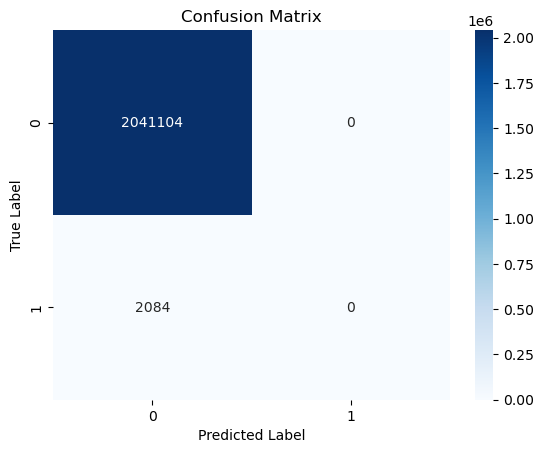

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 计算混淆矩阵
conf_matrix = confusion_matrix(ytest, rfc.predict(xtest))

# 使用热力图展示混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
# 预测
y_pred = rfc.predict(xtest)
# 评估均方误差
mse = mean_squared_error(ytest, y_pred)
print(f"MSE: {mse}")

MSE: 0.001043467365704967


In [16]:
# 查看所有的决策树
print(rfc.estimators_)

# 查看结果的类别
print(rfc.classes_)
# 查看类别数量
print(rfc.n_classes_)

# 查看预测结果标签值
print(rfc.predict(xtest))

# 标签是1的可能性 出来的结果左边的标签值为0的概率 右边是标签值为1的概率
print(rfc.predict_proba(xtest)[:,:])
# 只取标签为1的概率
print(rfc.predict_proba(xtest)[:,1])

# roc分数的计算
sc = roc_auc_score(ytest,rfc.predict_proba(xtest)[:,1])
print(sc)

# 各个feature的重要性
print(rfc.feature_importances_)

0.7955887777495322
[1.44874357e-01 1.78600682e-02 7.97208211e-04 3.49541820e-02
 1.27048249e-03 2.53105409e-02 7.21962869e-04 7.74211198e-01]


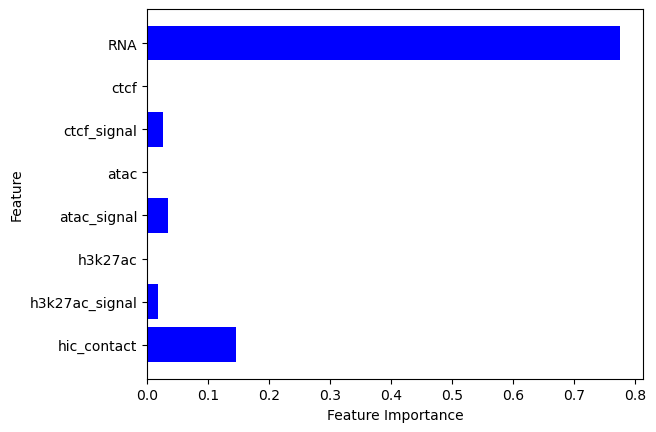

In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

feature_importances = rfc.feature_importances_

# 获取特征名（这里需要根据实际数据集替换）
feature_names = x.columns

# 绘制特征重要性
plt.barh(range(len(feature_importances)), feature_importances, color='b')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

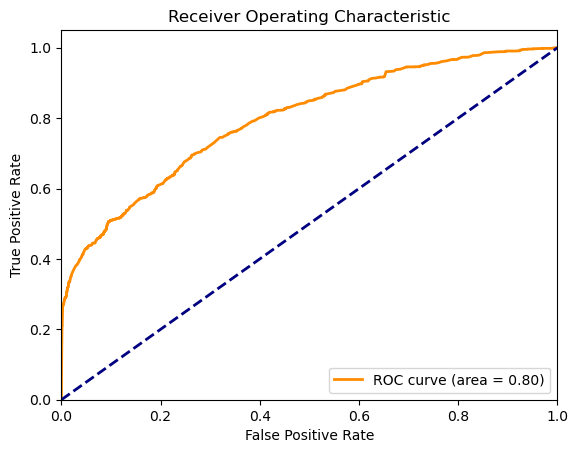

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 假设是二分类问题
y_prob = rfc.predict_proba(xtest)[:, 1]  # 获取正类的预测概率

fpr, tpr, thresholds = roc_curve(ytest, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 112 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 40.5min remaining: 17.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 41.0min finished


Cross-Validation Accuracy Scores: [0.99897317 0.99898003 0.99895555 0.99892619 0.99900548 0.99902505
 0.99906029 0.99892815 0.99897317 0.99897121]
Mean Accuracy: 0.998979829359255


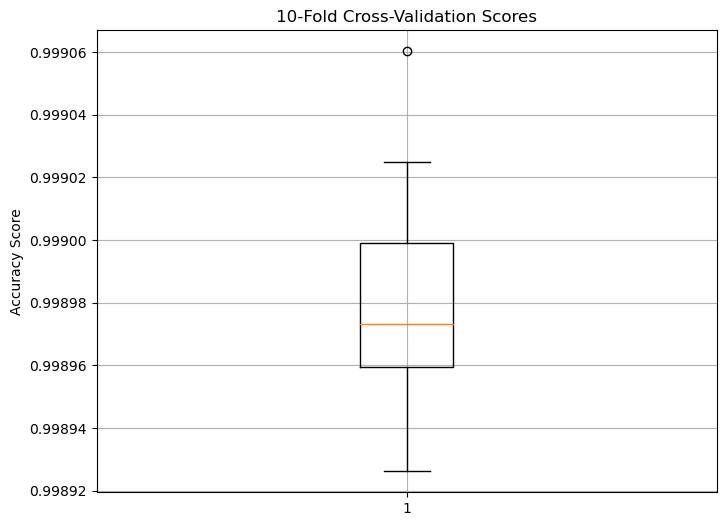

In [15]:
# 进行5折交叉验证 soring:调用方法（包括accuracy和mean_squared_error等等）
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(estimator=rfc, X=x, y=y, scoring='accuracy', cv=kf, n_jobs=-1, verbose=1)
# 输出每折的准确率和平均准确率
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")


# 绘制箱型图
plt.figure(figsize=(8, 6))
plt.boxplot(scores)
plt.title('10-Fold Cross-Validation Scores')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()


In [16]:
scores

array([0.99897317, 0.99898003, 0.99895555, 0.99892619, 0.99900548,
       0.99902505, 0.99906029, 0.99892815, 0.99897317, 0.99897121])

## 重新训练数据集

In [ ]:
# 查看训练集
print(xtrain.shape)

In [ ]:
# 调整森林中树的数量

param_test1 = {'n_estimators': range(20,500,10)}
# estimator输入分类器（分类器的参数）
# param_grid= 需要调参的超参名
# scoring = 每次评估使用的分数
# cv = 每次进行几折交叉验证
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(min_samples_split=50,
                                                          min_samples_leaf=20,
                                                          max_depth=8,random_state=10),
                         param_grid=param_test1,
                         scoring='roc_auc',
                         cv=5)
 gsearch1.fit(xtrain,ytrain)
# # 输出最好的参数和最好的分数
print(gsearch1.best_params_,gsearch1.best_score_)
# 输出结果 {'n_estimators': 220} 0.8620994691397194

In [ ]:

# 调整最小样本数 和 最小叶节点的样本数
param_test2 = {'min_samples_split':range(20,200,10),'min_samples_leaf':range(10,200,10)}
gsearch2 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=220,
                                                          max_depth=8,random_state=10),
                         param_grid=param_test2,
                         scoring='roc_auc',
                         cv=3)
gsearch2.fit(xtrain,ytrain)
# 输出最好的参数和最好的分数
print(gsearch2.best_params_,gsearch2.best_score_)
# 输出结果{'min_samples_leaf': 10, 'min_samples_split': 30} 0.8675084144386757

In [ ]:
# 调整最大深度
param_test3 = {'max_depth':range(2, 50, 2)}
gsearch3 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=220,
                                                          min_samples_leaf = 10,
                                                          min_samples_split = 30,
                                                          random_state=10),
                         param_grid=param_test3,
                         scoring='roc_auc',
                         cv=3)
gsearch3.fit(xtrain, ytrain)
# 输出最好的参数和最好的分数
print(gsearch3.best_params_, gsearch3.best_score_)
# 输出结果{'max_depth': 8} 0.8675084144386757

In [ ]:
scor = roc_auc_score(ytest, gsearch3.best_estimator_.predict_proba(xtest)[:, 1])
print(scor)
# 0.964570943075616

print(gsearch3.best_estimator_)

# 调整分类方法 和样本平衡
param_test4 = {'criterion':['gini','entropy'], 'class_weight':[None,'balanced']}
gsearch4 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=220,
                                                          min_samples_leaf=10,
                                                          min_samples_split=30,
                                                          max_depth=8,
                                                          random_state=10),
                         param_grid=param_test4,
                         scoring='roc_auc',
                         cv=3)
gsearch4.fit(xtrain,ytrain)
print(gsearch4.best_params_, gsearch4.best_score_)
# {'class_weight': None, 'criterion': 'entropy'} 0.8722979957299399

scor = roc_auc_score(ytest, gsearch4.best_estimator_.predict_proba(xtest)[:, 1])
print(scor)
#0.9615972812234495